In [1]:
def grade_school_multiplication(A, B):   
    # Result --> store intermediate sums, initially all zeros
    res_arr = [0] * (len(A) + len(B))
    
    # Iterate through A in reverse
    for i in reversed(range(len(A))):
        a = int(A[i]) #current digit of A
        carry = 0

        # Iterate through B in reverse
        for j in reversed(range(len(B))):
            b = int(B[j]) #current digit of A
            # Multiply digits and add to the corresponding position in the result array
            sum = a * b + res_arr[i + j + 1] + carry
            carry = sum // 10
            res_arr[i + j + 1] = sum % 10
        
        # Add any leftover carry to the next position
        res_arr[i + j] += carry
    # Remove leading zeros from the result
    res_str = ""
    rflag = 0 #once the leading 0's are removed, dont remove any 0's after that
    for i in res_arr:
        if i == 0 and rflag == 0:
            continue
        else:
            rflag = 1
            res_str += str(i)
    if res_str:
        return int(res_str)
    return 0

# Uncomment this to take input.
# A = int(input())
# B = int(input())
# print(grade_school_multiplication(str(A), str(B)))  

In [2]:
def karatsuba(num1,num2):
    if num1 < 10 or num2 < 10:
        return num1*num2
    
    #convert to string to get number of digits easily
    str_num1 = str(num1)
    str_num2 = str(num2)
    num_digits = max(len(str_num1),len(str_num2))
    half_dig = (num_digits + 1)//2

    a1, a0 = num1//(10**half_dig), num1%(10**half_dig)
    b1, b0 = num2//(10**half_dig), num2%(10**half_dig)

    a1b1 = karatsuba(a1,b1)
    a0b0 = karatsuba(a0,b0)
    rest = karatsuba(a1+a0,b1+b0) #calculating (a1+a0)(b1+b0)

    return (10**(2*half_dig))*a1b1 +(10**((2*half_dig)//2))*(rest - (a1b1+a0b0)) + a0b0

# Uncomment this to take input.
# num1 = int(input())
# num2 = int(input())
# print("karatsuba", karatsuba(num1, num2))

In [3]:
# The algorithm works for input: 3^k(preferably) and both input should be preferably 
# of same size ( there is some edge cases where different length inputs does not 
# generate answers for which I have padded the min digit number with 0's. 
# Still the issue remains) 
class PolynomialMultiplication:
    def __init__(self, base_limit = 729):
        self.base_limit = base_limit
    
    def naive_multiply(self, poly1, poly2):
        """ Simple polynomial multiplication by distributing terms. """
        try:
            len1, len2 = len(poly1), len(poly2)
            result = [0 for _ in range(len1 + len2)]
          
            for j in range(len2):
                for i in range(len1):
                    result[j + i] += poly1[i] * poly2[j]

            return result
        except Exception as e:
            raise

    def toom_cook_multiply(self, poly1, poly2):
        """ Efficient Toom-Cook Polynomial Multiplication. """
        
        a_at_0, a_at_1, a_at_neg1, a_at_neg2, a_at_inf = [], [], [], [], []
        b_at_0, b_at_1, b_at_neg1, b_at_neg2, b_at_inf = [], [], [], [], []
        result_at_0, result_at_1, result_at_neg1, result_at_neg2, result_at_inf = [], [], [], [], []
        
        try:
            length = len(poly1)
            if length <= 9: return self.naive_multiply(poly1, poly2)
            
            # Divide polynomials into three segments: low, mid, and high.
            seg_size = length // 3
            a_high, a_mid, a_low = poly1[seg_size*2:], poly1[seg_size:seg_size*2], poly1[:seg_size]
            b_high, b_mid, b_low = poly2[seg_size*2:], poly2[seg_size:seg_size*2], poly2[:seg_size]
            
            # Polynomial evaluations
            a_at_0, b_at_0 = a_low, b_low
            a_at_1 = [a_low[i] + a_mid[i] + a_high[i] for i in range(seg_size)]
            b_at_1 = [b_low[i] + b_mid[i] + b_high[i] for i in range(seg_size)]
            a_at_neg1 = [a_low[i] - a_mid[i] + a_high[i] for i in range(seg_size)]
            b_at_neg1 = [b_low[i] - b_mid[i] + b_high[i] for i in range(seg_size)]
            a_at_neg2 = [a_low[i] - 2*a_mid[i] + 4*a_high[i] for i in range(seg_size)]
            b_at_neg2 = [b_low[i] - 2*b_mid[i] + 4*b_high[i] for i in range(seg_size)]
            a_at_inf, b_at_inf = a_high, b_high
            
            # Recursive pointwise multiplications
            result_at_0 = self.toom_cook_multiply(a_at_0, b_at_0)
            result_at_1 = self.toom_cook_multiply(a_at_1, b_at_1)
            result_at_neg1 = self.toom_cook_multiply(a_at_neg1, b_at_neg1)
            result_at_neg2 = self.toom_cook_multiply(a_at_neg2, b_at_neg2)
            result_at_inf = self.toom_cook_multiply(a_at_inf, b_at_inf)
                        
            # Interpolation to calculate the coefficients
            r3, r2, r1, r0, r4 = [], [], [], result_at_0, result_at_inf
            
            # r3 = (-result_at_neg2 + 3*result_at_neg1 - 3*result_at_0 + result_at_1 + 12*result_at_inf) / 6
            for i in range(2*seg_size):
                temp = (-result_at_neg2[i] + 3*result_at_neg1[i] - 3*result_at_0[i] + result_at_1[i] + 12*result_at_inf[i]) // 6
                r3.append(temp)
                
            # r2 = (3*result_at_neg1 - 6*result_at_0 + 3*result_at_1 - 6*result_at_inf) / 6
            for i in range(2*seg_size):
                temp = (3*result_at_neg1[i] - 6*result_at_0[i] + 3*result_at_1[i] - 6*result_at_inf[i]) // 6
                r2.append(temp)
                
            # r1 = (result_at_neg2 - 6*result_at_neg1 + 3*result_at_0 + 2*result_at_1 - 12*result_at_inf) / 6
            for i in range(2*seg_size):
                temp = (result_at_neg2[i] - 6*result_at_neg1[i] + 3*result_at_0[i] + 2*result_at_1[i] - 12*result_at_inf[i]) // 6
                r1.append(temp)

            # Assemble final result
            final_result = r0 + r2 + r4
            for i in range(2*seg_size): final_result[i + seg_size] += r1[i]
            for i in range(2*seg_size): final_result[i + 3*seg_size] += r3[i]
                
            return final_result
            
        except Exception as e:
            raise

# Uncomment this to take input.
# num1 = int(input())
# num2 = int(input())
# len_num1 = len(str(num1))
# len_num2 = len(str(num2))

# #padding smaller digits with 0.
# if len_num1 % 3:
#     len_num1 = len_num1 - len_num1 % 3 + 3
# if len_num2 % 3:
#     len_num2 = len_num2 - len_num2 % 3 + 3

# digits_num1, digits_num2 = [], []
# rem, temp = 0, num1

# while len_num1:
#     len_num1 -= 1
#     if temp == 0:
#         digits_num1.append(0)
#         continue
#     rem = temp % 10
#     digits_num1.append(rem)
#     temp = temp // 10
# digits_num1.reverse()

# rem, temp = 0, num2
# while len_num2:
#     len_num2 -= 1
#     if temp == 0:
#         digits_num2.append(0)
#         continue
#     rem = temp % 10
#     digits_num2.append(rem)
#     temp = temp // 10
# digits_num2.reverse()

# # Execute the multiplication
# multiplier = PolynomialMultiplication()
# result_list = multiplier.toom_cook_multiply(digits_num1, digits_num2)

# # Sum the final result
# final_result = 0
# for i in range(len(result_list)):
#     final_result += result_list[i] * (10 ** (len(result_list) - i - 1))

# print(int(final_result) // 10)

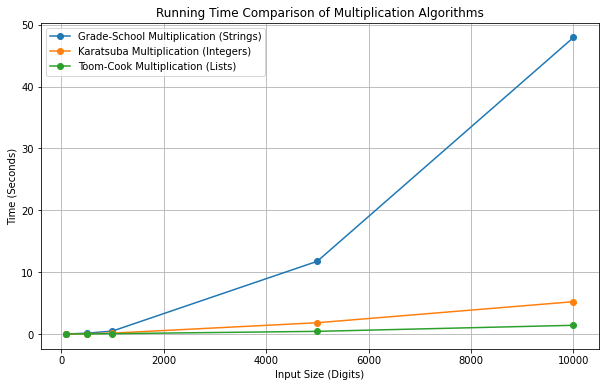

In [4]:
import time
import random
import matplotlib.pyplot as plt
# from Grade_school_multiplication import grade_school_multiplication
# from karatsuba_algo import karatsuba
# from toom_cook_algorithm import PolynomialMultiplication

def generate_large_number_str(n):
    return ''.join([str(random.randint(0, 9)) for _ in range(n)])

# Helper function to generate large random numbers as integers
def generate_large_number_int(n):
    return random.randint(10**(n-1), 10**n - 1)

# Helper function to convert an integer to a list of digits
def int_to_list(n):
    return [int(digit) for digit in str(n)]

# Time the algorithms
def time_algorithm(algorithm, input_gen, n):
    input1 = input_gen(n)
    input2 = input_gen(n)
    start_time = time.time()
    algorithm(input1, input2)
    return time.time() - start_time

# Input sizes
input_sizes = [100, 500, 1000, 5000, 10000]

# Results for each algorithm
grade_school_times = []
karatsuba_times = []
toom_cook_times = []

# Measure times for each algorithm and input size
toom_cook = PolynomialMultiplication()

for size in input_sizes:
    # Grade-School Multiplication (Strings as input)
    grade_school_times.append(time_algorithm(grade_school_multiplication, generate_large_number_str, size))
    
    # Karatsuba Multiplication (Integers as input)
    karatsuba_times.append(time_algorithm(karatsuba, generate_large_number_int, size))
    
    # Toom-Cook Multiplication (Lists as input)
    toom_cook_times.append(time_algorithm(toom_cook.toom_cook_multiply, lambda n: int_to_list(generate_large_number_int(n)), size))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, grade_school_times, label="Grade-School Multiplication (Strings)", marker='o')
plt.plot(input_sizes, karatsuba_times, label="Karatsuba Multiplication (Integers)", marker='o')
plt.plot(input_sizes, toom_cook_times, label="Toom-Cook Multiplication (Lists)", marker='o')

plt.xlabel("Input Size (Digits)")
plt.ylabel("Time (Seconds)")
plt.title("Running Time Comparison of Multiplication Algorithms")
plt.legend()
plt.grid(True)
plt.show()